# Importing The Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings("ignore")
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , Flatten, MaxPooling2D
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


# Loading The Datasets

In [2]:
TRAIN_DIR="/kaggle/input/facial-expression-dataset/train/train/"
TEST_DIR="/kaggle/input/facial-expression-dataset/test/test/"

In [3]:
def load_dataset(directory):
    image_paths=[]
    labels=[]
    for label in os.listdir(directory):
        for filename in os.listdir(os.path.join(directory, label)):
            image_path=os.path.join(directory,label,filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label,"completed")
    return image_paths, labels

In [4]:
train=pd.DataFrame()   # creating dataframe
train['image'],train['label']= load_dataset(TRAIN_DIR)
train = train.sample(frac=1).reset_index(drop=True)# shuffe the dataset
train.head()

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


,image,label
0,/kaggle/input/facial-expression-dataset/train/...,happy
1,/kaggle/input/facial-expression-dataset/train/...,neutral
2,/kaggle/input/facial-expression-dataset/train/...,happy
3,/kaggle/input/facial-expression-dataset/train/...,happy
4,/kaggle/input/facial-expression-dataset/train/...,fear


In [5]:
test=pd.DataFrame()   # creating dataframe
test['image'],test['label']= load_dataset(TEST_DIR)
test.head()

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


,image,label
0,/kaggle/input/facial-expression-dataset/test/t...,surprise
1,/kaggle/input/facial-expression-dataset/test/t...,surprise
2,/kaggle/input/facial-expression-dataset/test/t...,surprise
3,/kaggle/input/facial-expression-dataset/test/t...,surprise
4,/kaggle/input/facial-expression-dataset/test/t...,surprise


# Exploratory Data Analysis (EDA)

In [6]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Reshape the label column to a 2D array
labels_reshaped = train['label'].values.reshape(-1, 1)

# Fit and transform the labels
one_hot_encoded_labels = encoder.fit_transform(labels_reshaped)

# Create a DataFrame from the one-hot encoded labels
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_labels, columns=encoder.get_feature_names_out(['label']))

# Concatenate the one-hot encoded columns with the original DataFrame
train = pd.concat([train, one_hot_encoded_df], axis=1)

# Drop the original label column
train = train.drop(columns=['label'])

# Display the first few rows of the updated DataFrame
print(train.head())


                                               image  label_angry  \
0  /kaggle/input/facial-expression-dataset/train/...          0.0   
1  /kaggle/input/facial-expression-dataset/train/...          0.0   
2  /kaggle/input/facial-expression-dataset/train/...          0.0   
3  /kaggle/input/facial-expression-dataset/train/...          0.0   
4  /kaggle/input/facial-expression-dataset/train/...          0.0   

   label_disgust  label_fear  label_happy  label_neutral  label_sad  \
0            0.0         0.0          1.0            0.0        0.0   
1            0.0         0.0          0.0            1.0        0.0   
2            0.0         0.0          1.0            0.0        0.0   
3            0.0         0.0          1.0            0.0        0.0   
4            0.0         1.0          0.0            0.0        0.0   

   label_surprise  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


In [7]:
test_labels_reshaped = test['label'].values.reshape(-1, 1)

# Fit and transform the labels using the already fitted encoder
test_one_hot_encoded_labels = encoder.fit_transform(test_labels_reshaped)

# Create a DataFrame from the one-hot encoded labels
test_one_hot_encoded_df = pd.DataFrame(test_one_hot_encoded_labels, columns=encoder.get_feature_names_out(['label']))

# Concatenate the one-hot encoded columns with the original DataFrame
test = pd.concat([test, test_one_hot_encoded_df], axis=1)

# Drop the original label column
test = test.drop(columns=['label'])

# Verify the updated 'test' DataFrame
print("Updated 'test' DataFrame:")
print(test.head())

Updated 'test' DataFrame:
                                               image  label_angry  \
0  /kaggle/input/facial-expression-dataset/test/t...          0.0   
1  /kaggle/input/facial-expression-dataset/test/t...          0.0   
2  /kaggle/input/facial-expression-dataset/test/t...          0.0   
3  /kaggle/input/facial-expression-dataset/test/t...          0.0   
4  /kaggle/input/facial-expression-dataset/test/t...          0.0   

   label_disgust  label_fear  label_happy  label_neutral  label_sad  \
0            0.0         0.0          0.0            0.0        0.0   
1            0.0         0.0          0.0            0.0        0.0   
2            0.0         0.0          0.0            0.0        0.0   
3            0.0         0.0          0.0            0.0        0.0   
4            0.0         0.0          0.0            0.0        0.0   

   label_surprise  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  


In [8]:
print(train.columns)

Index(['image', 'label_angry', 'label_disgust', 'label_fear', 'label_happy',
       'label_neutral', 'label_sad', 'label_surprise'],
      dtype='object')


In [9]:
print(train.head())

                                               image  label_angry  \
0  /kaggle/input/facial-expression-dataset/train/...          0.0   
1  /kaggle/input/facial-expression-dataset/train/...          0.0   
2  /kaggle/input/facial-expression-dataset/train/...          0.0   
3  /kaggle/input/facial-expression-dataset/train/...          0.0   
4  /kaggle/input/facial-expression-dataset/train/...          0.0   

   label_disgust  label_fear  label_happy  label_neutral  label_sad  \
0            0.0         0.0          1.0            0.0        0.0   
1            0.0         0.0          0.0            1.0        0.0   
2            0.0         0.0          1.0            0.0        0.0   
3            0.0         0.0          1.0            0.0        0.0   
4            0.0         1.0          0.0            0.0        0.0   

   label_surprise  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  


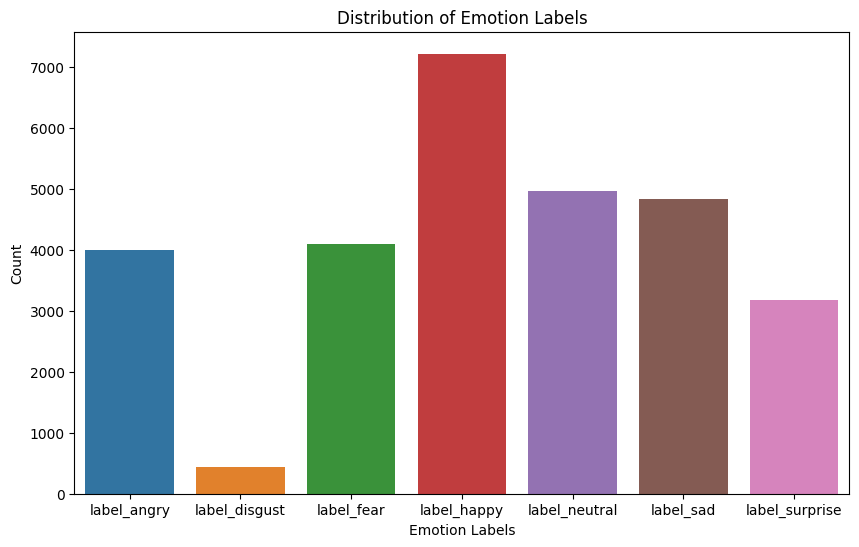

In [10]:
label_counts = train.iloc[:, 1:].sum()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels')
plt.show()


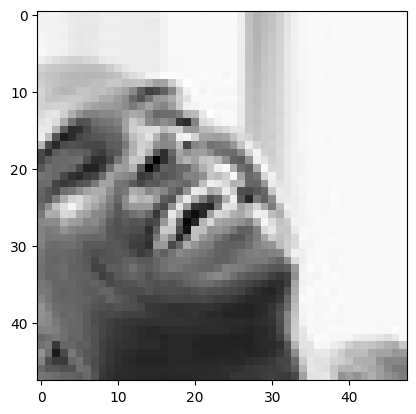

In [11]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

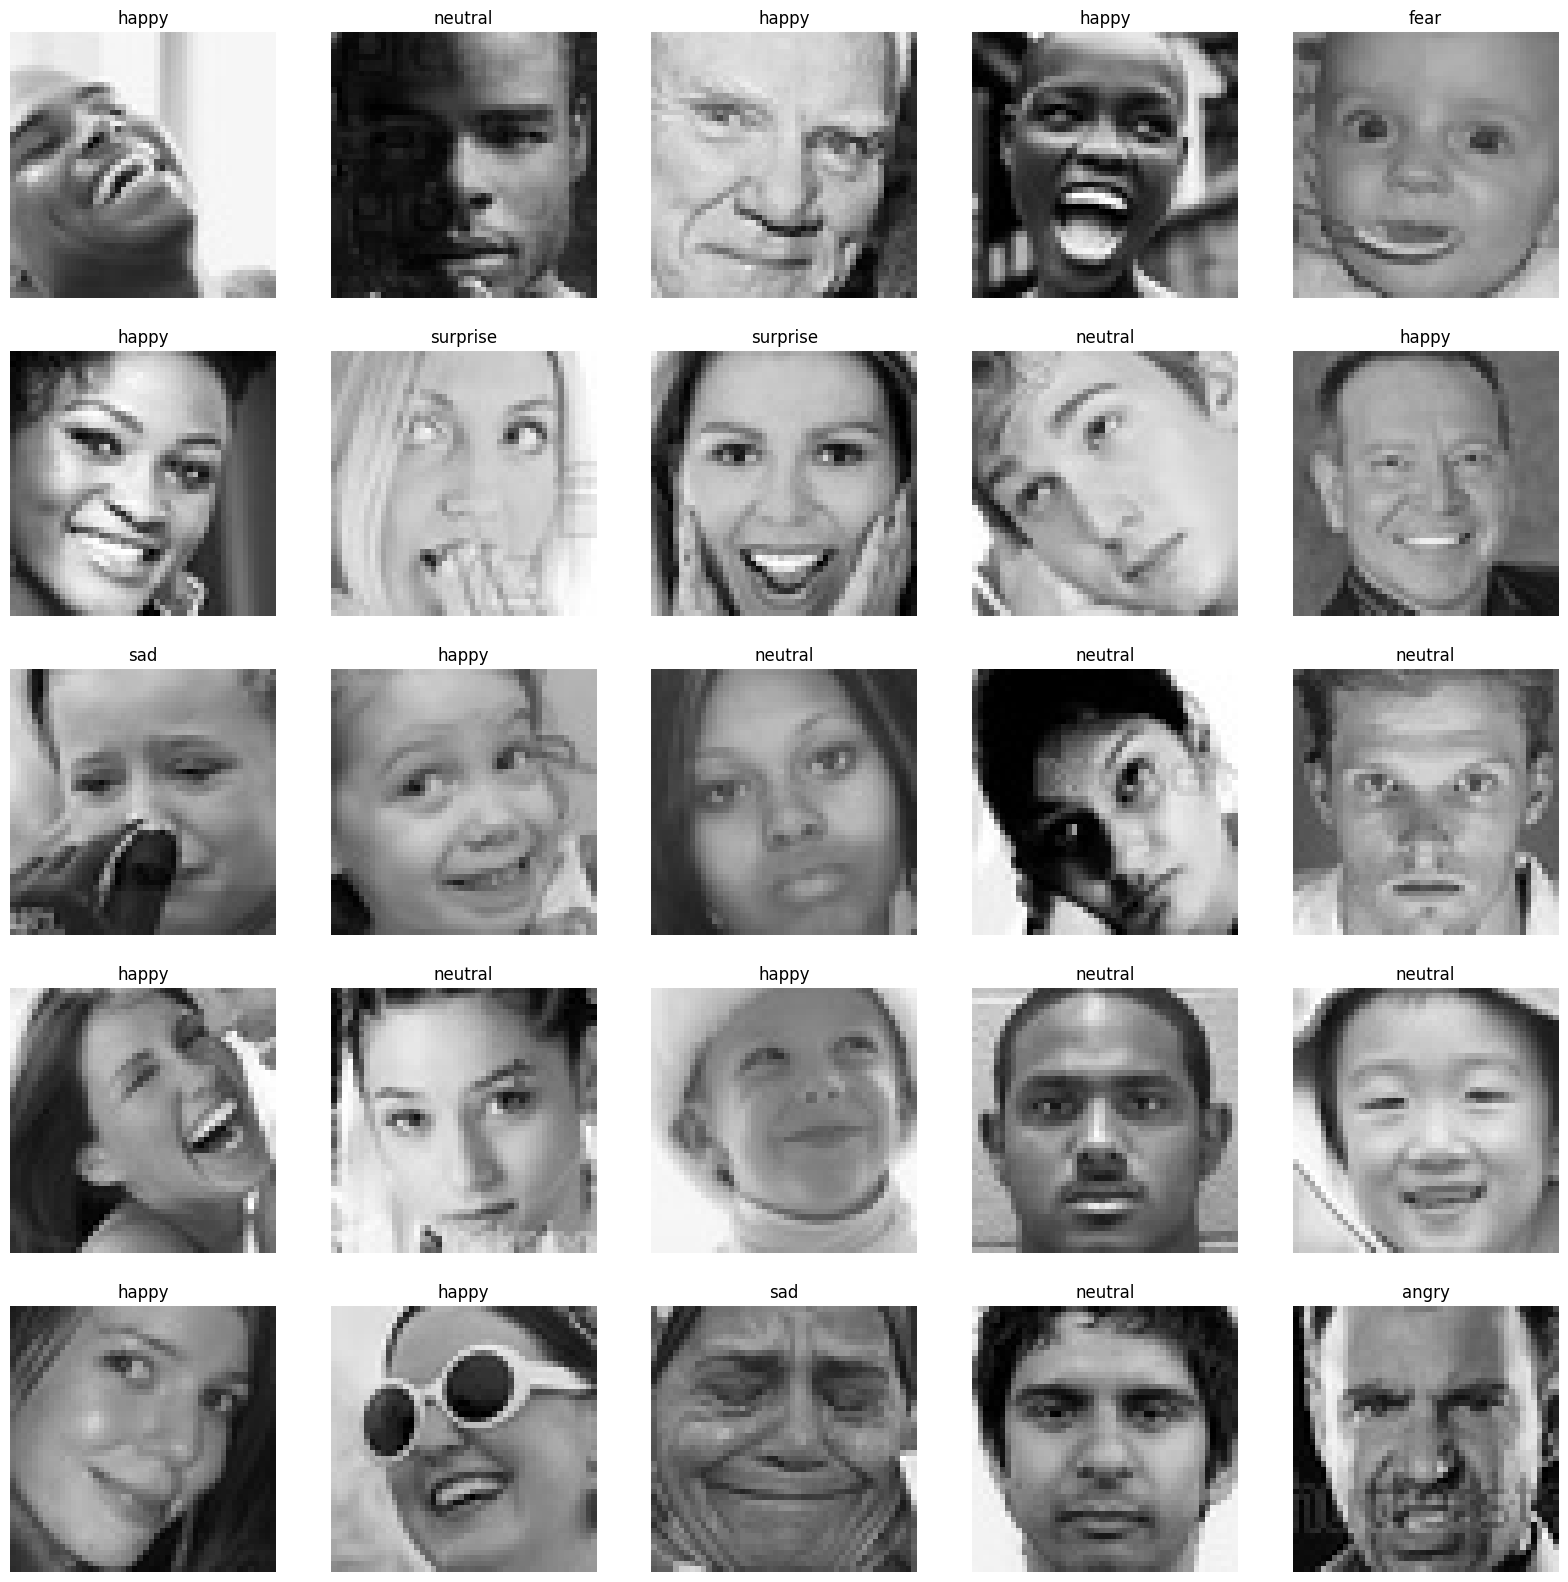

In [12]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]



label_columns = ['label_angry', 'label_disgust', 'label_fear', 'label_happy',
                 'label_neutral', 'label_sad', 'label_surprise']

for index, row in files.iterrows():
    plt.subplot(5, 5, index+1)
    img = load_img(row['image'])
    img = np.array(img)
    plt.imshow(img)
 # Find the label name
    label_name = label_columns[np.argmax(row[label_columns])].replace('label_', '')
    plt.title(label_name)
    plt.axis("off")


# Feature Extraction

In [13]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale", target_size=(48, 48))  # By using target_size=(48, 48) in load_img, each image is resized to 48x48 before being converted to a NumPy array and appended to the features list. This ensures uniform image dimensions.
        img=np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)  # for grayscale image we have to specify dimension as 1 and for RGB image dimension is 3
    return features

In [14]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [15]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

# Normalize the image

In [16]:
x_train = train_features/255.0
X_test = test_features/255.0 

In [17]:

# List of one-hot encoded label columns
label_columns = ['label_angry', 'label_disgust', 'label_fear', 'label_happy',
                 'label_neutral', 'label_sad', 'label_surprise']

# Create a new column 'original_label' by finding the max value index in one-hot encoded columns
train['original_label'] = train[label_columns].idxmax(axis=1)

# Remove the 'label_' prefix from the new 'original_label' column
train['original_label'] = train['original_label'].str.replace('label_', '')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original labels
label_encoder.fit(train['original_label'])
y_train = label_encoder.transform(train['original_label'])

# If you have a test dataset, do the same for the test dataset
test['original_label'] = test[label_columns].idxmax(axis=1)
test['original_label'] = test['original_label'].str.replace('label_', '')
y_test = label_encoder.transform(test['original_label'])

# Check the transformed labels
print(y_train[:5])
print(y_test[:5])


[3 4 3 3 2]
[6 6 6 6 6]


In [18]:
# Verify original labels
print("Train original labels:", train['original_label'].unique())
print("Test original labels:", test['original_label'].unique())

Train original labels: ['happy' 'neutral' 'fear' 'surprise' 'sad' 'angry' 'disgust']
Test original labels: ['surprise' 'fear' 'angry' 'neutral' 'sad' 'disgust' 'happy']


In [19]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [20]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.])

In [21]:
# config
input_shape = (48,48,1)
output_class = 7


# Model Creation

In [26]:
model = Sequential()

# convolutional layers
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# fully connected layers
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(output_class, activation= 'softmax'))

# optimizer
# optimizer=Adam(learning_rate=5e-5)


# Fit the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
# train the model
history = model.fit(x=x_train,y=y_train,batch_size=128, epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.2380 - loss: 1.8398 - val_accuracy: 0.2471 - val_loss: 1.8184
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.2472 - loss: 1.8090 - val_accuracy: 0.2796 - val_loss: 1.7326
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.2862 - loss: 1.7322 - val_accuracy: 0.3493 - val_loss: 1.6202
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.3454 - loss: 1.6234 - val_accuracy: 0.4302 - val_loss: 1.4546
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.4133 - loss: 1.5113 - val_accuracy: 0.4615 - val_loss: 1.3981
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.4462 - loss: 1.4350 - val_accuracy: 0.4925 - val_loss: 1.3197
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.4604 - loss: 1.4002 - val_accuracy: 0.4992 - val_loss: 1.2819
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.4762 - loss: 1.3660 -

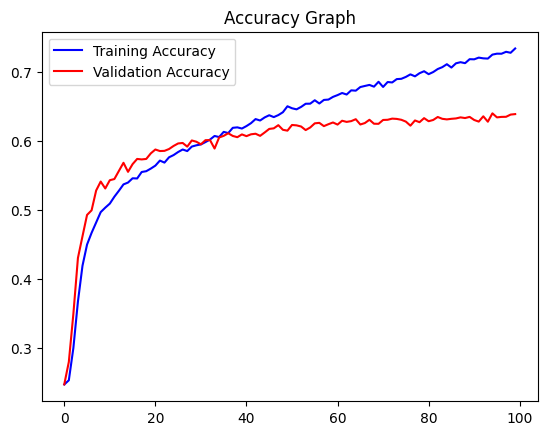

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()


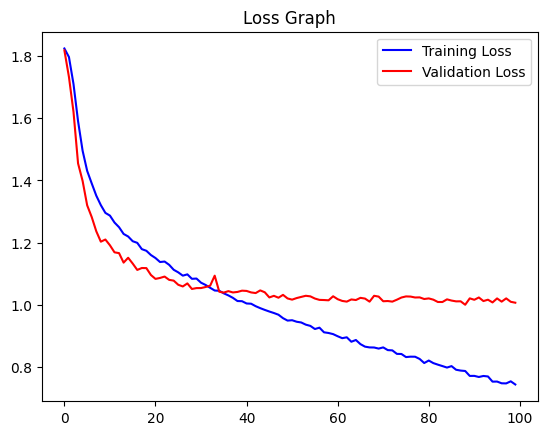

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

# Test With Image Data

Original Output: surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Output: surprise


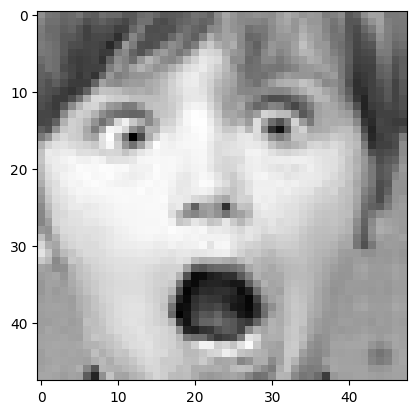

In [34]:

image_index = random.randint(0, len(X_test) - 1)


print('Original Output:', test['original_label'].iloc[image_index])  

# Predict the label for the selected test image
pred = model.predict(X_test[image_index].reshape(1, 48, 48, 1))

# Convert the prediction to a label
prediction_label = label_encoder.inverse_transform([pred.argmax()])
print("Predicted Output:", prediction_label[0])

# Display the test image
plt.imshow(X_test[image_index].reshape(48, 48), cmap='gray')
plt.show()

# End Of This Project